# This project is about the analysis of a Whatsapp Group to see interesting insights.
## Here I analysed our secondary school alumni WhatSapp group page 

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=14,6
import emoji
#from Ipython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity="all"
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

## Perform some data wrangling

In [32]:
#Load in the data
missing_values=["None","n/a"]
raw_data=pd.read_csv('ISCHS.txt',delimiter='\t',header=None,names=['text'],na_values=missing_values)
data=pd.read_csv('ISCHS.txt',delimiter='\t',header=None,names=['text'],na_values=missing_values)

In [33]:
#Check the data
data.head()

text
0  7/18/20, 21:26 - Messages and calls are end-to...
1  7/8/20, 22:10 - +234 814 111 6251 created grou...
2                  7/18/20, 21:25 - Ajasco added you
3     7/18/20, 21:26 - Ajasco: I just added ibikunle
4                      7/18/20, 21:26 - IBK: Hi guys

In [34]:
#Extract datetime
data[['datetime','text_2']]=data["text"].str.split("-",1,expand=True)

In [35]:
#Check the data
data.head()

text         datetime  \
0  7/18/20, 21:26 - Messages and calls are end-to...  7/18/20, 21:26    
1  7/8/20, 22:10 - +234 814 111 6251 created grou...   7/8/20, 22:10    
2                  7/18/20, 21:25 - Ajasco added you  7/18/20, 21:25    
3     7/18/20, 21:26 - Ajasco: I just added ibikunle  7/18/20, 21:26    
4                      7/18/20, 21:26 - IBK: Hi guys  7/18/20, 21:26    

                                              text_2  
0   Messages and calls are end-to-end encrypted. ...  
1   +234 814 111 6251 created group "Best set eve...  
2                                   Ajasco added you  
3                      Ajasco: I just added ibikunle  
4                                       IBK: Hi guys

In [38]:
data.shape

(10584, 3)

In [39]:
#Drop the datetime_str column as we don't need it anymore
#data=data.drop(columns=['datetime_str'])
#Extract sender and message
data[['sender','text_message']]=data["text_2"].str.split(':',1,expand=True)



In [40]:
#Drop the text and text_2 columns as we don't need them anymore
data=data.drop(columns=["text","text_2"])

In [41]:
#Check the data now
data

datetime  \
0                                        7/18/20, 21:26    
1                                         7/8/20, 22:10    
2                                        7/18/20, 21:25    
3                                        7/18/20, 21:26    
4                                        7/18/20, 21:26    
5                                        7/18/20, 21:26    
6                                        7/18/20, 21:26    
7                                        7/18/20, 21:27    
8                                        7/18/20, 21:27    
9                                        7/18/20, 21:27    
10                                       7/18/20, 21:28    
11                                       7/18/20, 21:28    
12                                       7/18/20, 21:29    
13                                       7/18/20, 21:29    
14                                       7/18/20, 21:29    
15                                       7/18/20, 21:30    
16                                       7/18/20, 21:31    
17                                       7/18/20, 21:31    
18                                       7/18/20, 21:33    
19                                       7/18/20, 21:39    
20                                       7/18/20, 21:40    
21                                       7/18/20, 21:40    
22                                       7/18/20, 21:41    
23                 We go they explain ourselves tomorrow   
24                                       7/18/20, 21:43    
25                                       7/18/20, 21:57    
26                                       7/18/20, 22:34    
27                                  Nice memory brother.   
28                                       7/18/20, 22:34    
29                                       7/18/20, 22:49    
30                                     *Enu e lowa yen*    
31                                 *Bro/Sis.mature mind*   
32                                       7/18/20, 22:50    
33                                       7/18/20, 22:51    
34                                             *Status*    
35                                               *Work*    
36                                            *Picture*    
37                                 *State of residence*    
38                    *Pls let’s make it in this format*   
39                                       7/18/20, 22:51    
40                                       7/18/20, 22:51    
41                                       7/18/20, 22:52    
42                                       7/18/20, 22:52    
43                                       7/18/20, 22:52    
44                                       7/18/20, 22:53    
45                                       7/18/20, 22:53    
46                                                Simple   
47                                       7/18/20, 22:53    
48                                       7/18/20, 22:53    
49                                       7/18/20, 22:53    
50                                   Anytime others come   
51                                        They do theirs   
52                                       7/18/20, 22:53    
53                                       7/18/20, 22:54    
54                                       7/18/20, 22:54    
55                                       7/18/20, 22:55    
56                                       7/18/20, 22:55    
57                                       7/18/20, 22:55    
58                                       7/18/20, 22:55    
59                                       7/18/20, 22:55    
60                                       7/18/20, 22:56    
61                                       7/18/20, 22:56    
62                                       7/18/20, 22:56    
63                                       7/18/20, 22:56    
64                                       7/18/20, 22:56    
65                                       7/18/20, 22:57    
66                          

## Heatmap showing frequency of posts

In [44]:
#Create new fields to use in heatmap
data["datetime"]=pd.to_datetime(data["datetime"],errors='coerce')
data['day_of_week']=data["datetime"].dt.dayofweek+1

In [45]:
#Ensure the datetime column is indeed in data time column
data["datetime"]=pd.to_datetime(data["datetime"],errors='coerce')

In [46]:
#Create a column for hour of the day
data['hour_of_day']=data['datetime'].dt.hour

In [47]:
#Create an object of the data counts
heatmap_data=data.groupby(['day_of_week','hour_of_day']).size()
heatmap_data=heatmap_data.unstack()

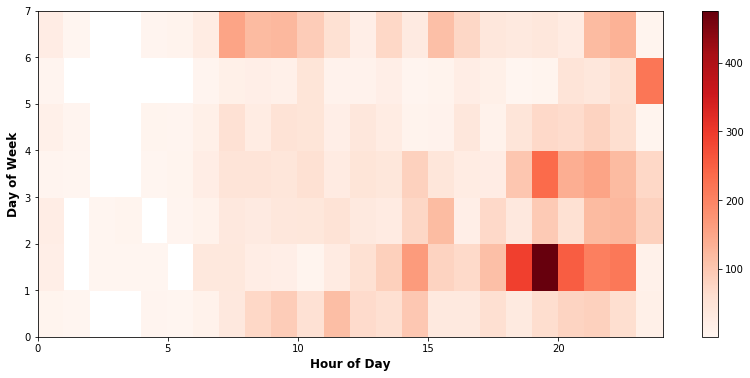

In [71]:
#Create the heatmap
plt.pcolor(heatmap_data,cmap='Reds')
plt.xlabel("Hour of Day",fontsize='12',fontweight='bold')
plt.ylabel("Day of Week",fontsize='12',fontweight='bold')
plt.colorbar()
plt.show()

In [49]:
#Check the heatmap object
heatmap_data

hour_of_day  0.0   1.0   2.0   3.0   4.0   5.0   6.0    7.0    8.0    9.0   \
day_of_week                                                                  
1.0           6.0   2.0   NaN   NaN   3.0   2.0  12.0   38.0   74.0   92.0   
2.0          20.0   NaN   1.0   1.0   2.0   NaN  39.0   39.0   24.0   20.0   
3.0          24.0   NaN   2.0   5.0   NaN   3.0  12.0   38.0   31.0   41.0   
4.0           4.0   1.0   NaN   NaN   1.0   6.0  25.0   51.0   50.0   45.0   
5.0          15.0   3.0   NaN   NaN   5.0   3.0  17.0   58.0   28.0   53.0   
6.0           4.0   NaN   NaN   NaN   NaN   NaN   4.0   17.0   20.0   14.0   
7.0          26.0   1.0   NaN   NaN   4.0   7.0  27.0  154.0  121.0  124.0   

hour_of_day  10.0   11.0  12.0  13.0   14.0   15.0  16.0   17.0   18.0   19.0  \
day_of_week                                                                     
1.0          57.0  116.0  68.0  61.0  100.0   35.0  35.0   61.0   34.0   65.0   
2.0           5.0   30.0  60.0  88.0  167.0   82.0  71.0  114.0  294.0  476.0   
3.0          42.0   53.0  36.0  30.0   77.0  119.0  21.0   72.0   38.0   97.0   
4.0          59.0   29.0  49.0  43.0   86.0   45.0  28.0   26.0  103.0  238.0   
5.0          49.0   21.0  40.0  27.0    8.0    9.0  40.0   12.0   47.0   73.0   
6.0          48.0   10.0   9.0  21.0    4.0    7.0  25.0   17.0    2.0    5.0   
7.0          93.0   60.0  20.0  74.0   32.0  113.0  76.0   41.0   35.0   40.0   

hour_of_day   20.0   21.0   22.0   23.0  
day_of_week                              
1.0           80.0   85.0   64.0   16.0  
2.0          254.0  208.0  218.0   13.0  
3.0           60.0  121.0  124.0   85.0  
4.0          140.0  155.0  120.0   75.0  
5.0           66.0   82.0   64.0    5.0  
6.0           50.0   41.0   59.0  221.0  
7.0           29.0  121.0  134.0    5.0

## Messages by Top 10 Senders

In [50]:
#Create sender count as a series
sender_count_series=data.groupby(['sender']).size().sort_values(ascending=False)[:10]

In [51]:
#Creat sender count as a dataframe
sender_count_df=pd.DataFrame(sender_count_series)

In [52]:
#Reset index in order to rename column properly
sender_count_df=sender_count_df.reset_index()


In [53]:
#Rename columns properly
sender_count_df.columns=['sender','count']

In [54]:
#Examine the first few rows of the data
sender_count_df.head()

sender  count
0   +234 701 035 2608   1065
1   +234 901 184 3360    711
2   +234 815 779 7617    569
3   +234 818 193 5727    549
4   +234 813 385 5027    406

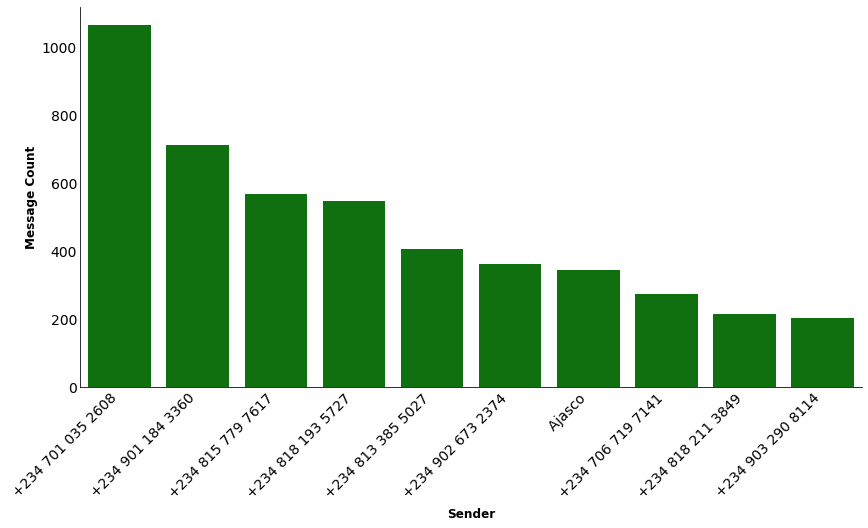

In [67]:
#Plot bar chart with sender message counts
#plt.figure(figsize=(15,5))
fontdict={'fontsize':12,'weight':'bold'}
fig,ax=plt.subplots(figsize=(14,7))
sns.barplot(x='sender',y='count',color='green',data=sender_count_df,ax=ax)
ax.set_xlabel('Sender',fontdict=fontdict)
ax.set_ylabel('Message Count',fontdict=fontdict)
ax.tick_params(labelsize=14,length=0) #Remove the tick line and also increase the font size
plt.xticks(rotation=45,ha="right") #Rotate the xlabel
#Remove the borders/spines of the chart from the top and the right side
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show();

In [58]:
#Most popularly used words
#Create a dataframe with all words used split by senders
#Filter out Media Omitted messages
data_texts=data[data['text_message']!="None"]

In [57]:
data_texts.head()

datetime                                             sender  \
0 2020-07-18 21:26:00   Messages and calls are end-to-end encrypted. ...   
1 2020-07-08 22:10:00   +234 814 111 6251 created group "Best set eve...   
2 2020-07-18 21:25:00                                   Ajasco added you   
3 2020-07-18 21:26:00                                             Ajasco   
4 2020-07-18 21:26:00                                                IBK   

             text_message  day_of_week  hour_of_day  
0                    None          6.0         21.0  
1                    None          3.0         22.0  
2                    None          6.0         21.0  
3   I just added ibikunle          6.0         21.0  
4                 Hi guys          6.0         21.0

In [ ]:
#Remove None from the dataframe
data_texts=data_texts.replace(to_replace='None',value=np.nan).dropna().reset_index()

In [ ]:
data_texts

In [ ]:
#Create empty DataFrane to use for the word count 
words= pd.DataFrame(columns=['sender','words'])
#Loop through all the message in the DataFrame
for sender,message  in zip(data.sender,data.text_message):
    message_split= list(message)
    for word in message_split:
        words=words.append({'sender':sender,'words':word.lower()},ignore_index=True)        

    

In [ ]:
#Display top 10 words
#word_count_total.head(10)

In [ ]:
#We can pick out words and see how high they rank
#word_count_total[word_count_total['words'].isin(['class','birthday','together','party','advertise','happy','games','face','set','guy','lady','married','smile'])]

In [ ]:
#We are interested in seeing wod count by sender
#Create word counts by sender as a series
##word_count_by_sender_series= words_filtered.groupby(['sender','words']).size().sort_values(ascending=False)
#Create  word counts by sender series as a DataFrame 
word_count_by_sender=pd.DataFrame(word_count_by_sender_series)

In [61]:
#emojis=pd.DataFrame(columns=['sender','emoji','datetime'])


In [64]:
#for sendr,message,datetime in zip(data.sender,data.text_message,data.datetime):
   # message_split=list(message)
    #for character in message_split:
       # if character in emoji.UNICODE_EMOJI and character!="\U0001f3fc":
            #emojis=emojis.append({'sender':sender,'emoji':character,'datetime':datetime},ignore_index=True)

In [65]:
#Display top n most popular emojis
#emojis.groupby(['emoji']).size().sort_values(ascending=False).head(10)